## Trabalho Final - Ciência de Dados - Enap / 2020

*Por José Luiz Neves Voltan -  DEZ 2020*

### Apresentação do Dataset

O trabalho terá como tema as questões remuneratórias e de carreira dos servidores federais do poder executivo federal. Serão estudadas questões remuneração, quantidade de funcionários, envelhecimento dos quadros e ingresso no serviço público. 


Os dados foram obtidos através do site http://transparencia.gov.br/download-de-dados/servidores  selecionando o ano de **2020**. Dentro do ano, se selecionou o mês de **maio**. Quanto à categoria, selecionei **servidores**. Dessa forma foi gerado 1 dataset. Selecionei dois arquivos CSV, um referente ao **cadastro do servidor** com informações como identificador único, nome, miolo do CPF, regime de trabalho; o outro com **informações remuneratórias**.

* O dicionário do cadastro dos servidores pode ser obtido através da URL: http://transparencia.gov.br/pagina-interna/603422-dicionario-de-dados-servidores-cadastro

* O dicionário das informações remuneratórias dos servidores pode ser obtido através da URL: http://transparencia.gov.br/pagina-interna/603423-dicionario-de-dados-servidores-remuneracao


Assim toda análise feita neste trabalho se restringirá ao universo dos **funcionários público do poder executivo, a nível federal**, considerando-se a folha de pagamento de **maio** de **2020**

#### Link para Download do Dataset

 Tendo em vista o grande volume de dados, inseri os arquivos em um drive virtual.
 link= "https://mega.nz/folder/z0MHmaqQ#TPKceqoF3R_29DgmjllDxw"

In [62]:
servidor_2020_cadastro= "2020_maio_servidor_Cadastro.csv"
servidor_2020_remuneracao= "2020_maio_servidor_Remuneracao.csv"
mediasalarial="mediasalarial.csv"

### Motivação Pessoal

As **questões envolvendo a carreira e a remuneração dos servidores públicos do poder executivo** são algo que volta e meia recebem o destaque da mídia, muitas vezes focando apenas no gasto e sem levar em conta os serviços oferecidos para a população. Muitas análises são superficiais e tendenciosas com um forte viés que compromete o estudo/ideia apresentada. Tem-se a ideia preconcebida e buscam se dados que a confirmem, ignorando o que não é pertinente para a conclusão que se deseja chegar. 

Essa temática sempre despertou meu interesse, por acreditar que o serviço público existe para servir a nação oferecendo suporte à população e assegurando direitos como a saúde, educação e segurança.

### Investigação

In [63]:
# Importe as bibliotecas pandas, numpy, glob e sqlalchemy
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
#Versão do Seaborn
#sns.__version__

#Ignorar mensagens de atenção
import warnings
warnings.filterwarnings("ignore")

Nos datasets de cadastro dos servidores, trabalharemos com as colunas: **Id_SERVIDOR_PORTAL  DESCRICAO_CARGO SITUACAO_VINCULO DATA_INGRESSO_ORGAO**	

In [64]:
df_servidor_2020_cadastro = pd.read_csv(servidor_2020_cadastro, sep=";",usecols= ["Id_SERVIDOR_PORTAL",  "DESCRICAO_CARGO", "SITUACAO_VINCULO", "DATA_INGRESSO_ORGAO"], low_memory=False)   

In [65]:
#Observando inicialmente o Dataset
# print(df_servidor_2020_cadastro.head(3))
# print(df_servidor_2020_cadastro.tail(3))
print(df_servidor_2020_cadastro.dtypes)
df_servidor_2020_cadastro.shape

Id_SERVIDOR_PORTAL      int64
DESCRICAO_CARGO        object
SITUACAO_VINCULO       object
DATA_INGRESSO_ORGAO    object
dtype: object


(765091, 4)

In [66]:
# Tratamento inicial do dataset

# - Remoção de duplicatas na Chave
df_servidor_2020_cadastro.duplicated(subset='Id_SERVIDOR_PORTAL').sum()
df_servidor_2020_cadastro_pos = df_servidor_2020_cadastro.drop_duplicates(subset='Id_SERVIDOR_PORTAL', keep='first')
df_servidor_2020_cadastro_pos.duplicated(subset='Id_SERVIDOR_PORTAL').sum()

#Temos problemas com NA (1989) na coluna DATA_INGRESSO_ORGAO -> Merece atenção no momento que trabalharmos com data
print(df_servidor_2020_cadastro.isna().sum())

# df_servidor_2013_cadastro.isnull().sum()

Id_SERVIDOR_PORTAL        0
DESCRICAO_CARGO           0
SITUACAO_VINCULO          0
DATA_INGRESSO_ORGAO    1990
dtype: int64


Nos datasets de remuneração dos servidores, trabalharemos com as colunas:
**Id_SERVIDOR_PORTAL,  REMUNERAÇÃO BÁSICA BRUTA (R\\$), TOTAL DE VERBAS INDENIZATÓRIAS (R\\$), REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R\\$)**	

In [67]:
df_servidor_2020_remuneracao = pd.read_csv(servidor_2020_remuneracao,usecols= ["Id_SERVIDOR_PORTAL",  "REMUNERAÇÃO BÁSICA BRUTA (R$)", "TOTAL DE VERBAS INDENIZATÓRIAS (R$)(*)", "REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)"], sep=";", low_memory=False)   

Destaco que a **REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)** é definida pelo dicionario de dados como "*Valor obtido pela soma das remunerações básica e eventual, descontados o abate teto, as deduções obrigatórias e demais deduções.*"

- Na Análise sobre a remuneração dos servidores será levada em consideração a REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS, uma vez que mesmo que o servidor receba um valor bruto maior do que o teto constitucional, após aplicação do abate teto, sua remuneração ficaria menor. Dessa forma, uma análise sobre a REMUNERAÇÃO BÁSICA BRUTA não refletiria a realidade para vencimentos mais altos.

In [68]:
#Observando inicialmente o Dataset
# print(df_servidor_2020_remuneracao.head(3))
# print(df_servidor_2020_remuneracao.tail(3))
print(df_servidor_2020_remuneracao.dtypes)
df_servidor_2020_remuneracao.shape

Id_SERVIDOR_PORTAL                             float64
REMUNERAÇÃO BÁSICA BRUTA (R$)                   object
REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)     object
TOTAL DE VERBAS INDENIZATÓRIAS (R$)(*)          object
dtype: object


(549474, 4)

In [69]:
# Tratamento inicial do dataset
df_servidor_2020_remuneracao.duplicated(subset='Id_SERVIDOR_PORTAL').sum()
# df_servidor_2020_remuneracao = df_servidor_2020_remuneracao.drop_duplicates()

#Temos problemas com NA (3423) na coluna DATA_INGRESSO_ORGAO -> Merece atenção no momento que trabalharmos com data
df_servidor_2020_remuneracao.isna().sum()

df_servidor_2020_remuneracao.dropna(subset=['Id_SERVIDOR_PORTAL'], inplace=True)
# Verificando se deu certo:
df_servidor_2020_remuneracao.isnull().sum()


Id_SERVIDOR_PORTAL                             0
REMUNERAÇÃO BÁSICA BRUTA (R$)                  0
REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)    0
TOTAL DE VERBAS INDENIZATÓRIAS (R$)(*)         0
dtype: int64

- Preferi fazer o tratamento apenas na análise para evitar a inserção de viés na pesquisa. Por exemplo, se pessoas com datas de ingresso mais antigas tendem a receber mais, e essas pessoas aparecem no campo data de ingresso como NA, caso simplesmente removêssemos as tuplas estaríamos abaixando a média salarial dos servidores. Entretanto, no campo 'Id_SERVIDOR_PORTAL' fiz a remoção, pois ele será utilizado como chave para o merge com remuneração. 

In [70]:
#Fazendo um merge
df_servidor_2020 = pd.merge(df_servidor_2020_cadastro_pos, df_servidor_2020_remuneracao, on='Id_SERVIDOR_PORTAL')

In [71]:
# df_servidor_2020

- Preparando a coluna REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS para ser convertida em float

In [72]:
df_servidor_2020["REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)"]=df_servidor_2020["REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)"].str.replace(",",".")
# df_servidor_2020

In [73]:
# Convertendo o tipo da coluna
df_servidor_2020["REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)"] = pd.to_numeric(df_servidor_2020["REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)"],downcast='float', errors='ignore')
df_servidor_2020

,Id_SERVIDOR_PORTAL,DESCRICAO_CARGO,SITUACAO_VINCULO,DATA_INGRESSO_ORGAO,REMUNERAÇÃO BÁSICA BRUTA (R$),REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$),TOTAL DE VERBAS INDENIZATÓRIAS (R$)(*)
0,5116961,BIBLIOTECARIO-DOCUMENTALISTA,ATIVO PERMANENTE,29/12/2008,"7967,90",5984.979980,"991,29"
1,201964,ANALISTA DO BANCO CENTRAL,ATIVO PERMANENTE,NaN,"34006,68",25763.789062,"458,00"
2,4405000,Sem informação,ATIVO PERMANENTE,24/07/2006,"14249,03",9887.940430,"458,00"
3,4915841,PROFESSOR ENS BASICO TECN TECNOLOGICO,ATIVO PERMANENTE,29/12/2008,"21007,45",13964.879883,"798,12"
4,5105492,AGENTE DE COMBATE AS ENDEMIAS,CEDIDO SUS/LEI 8270,04/09/2014,"5896,78",4754.040039,"1031,32"
...,...,...,...,...,...,...,...
529904,216805,PROFESSOR DO MAGISTERIO SUPERIOR,ATIVO PERMANENTE,27/09/2005,"19646,82",13156.549805,"579,14"
529905,1307290,AUXILIAR DE ENFERMAGEM,ATIVO PERMANENTE,23/12/1996,"4801,59",4275.839844,"732,18"
529906,205958561,Inválido,SEM VINCULO,27/04/2020,"0,00",13191.980469,"0,00"
529907,8504240,PROFESSOR DE 1 GRAU,ATIVO PERMANENTE,01/08/1986,"6612,02",5663.080078,"588,71"


#### Atualmente **quantos, quais e qual o efetivo** dos cargos existentes no poder executivo a nível federal?

In [74]:
quantidade_cargo = df_servidor_2020.groupby("DESCRICAO_CARGO")["DESCRICAO_CARGO"].count().sort_values(ascending=False)
quantidade_cargo

DESCRICAO_CARGO
PROFESSOR DO MAGISTERIO SUPERIOR           77664
Sem informação                             53729
PROFESSOR ENS BASICO TECN TECNOLOGICO      41681
ASSISTENTE EM ADMINISTRACAO                28782
Inválido                                   24683
                                           ...  
PROFESSOR DO ENSINO BASICO FEDERAL             1
PROFESSOR DE 1  E 2  GRAUS - SUBSTITUTO        1
AUX OPERAC ASSUNTOS CULTURAIS                  1
PROFESSOR 1º GRAU                              1
ESPECIALISTA - ADVOGADO                        1
Name: DESCRICAO_CARGO, Length: 1436, dtype: int64

* Os 10 (dez) cargos com mais servidores:

In [75]:
#Top 10
quantidade_cargo.head(10)

DESCRICAO_CARGO
PROFESSOR DO MAGISTERIO SUPERIOR         77664
Sem informação                           53729
PROFESSOR ENS BASICO TECN TECNOLOGICO    41681
ASSISTENTE EM ADMINISTRACAO              28782
Inválido                                 24683
AGENTE ADMINISTRATIVO                    14599
TECNICO DO SEGURO SOCIAL                 13426
AUXILIAR DE ENFERMAGEM                   12772
POLICIAL RODOVIARIO FEDERAL               9992
TECNICO DE LABORATORIO AREA               9737
Name: DESCRICAO_CARGO, dtype: int64

* Cargos com menos de 20 servidores

In [76]:
# Cargos com menos de 20 funcionários
(quantidade_cargo<20).sum()

959

* Cargos com mais de 100 servidores

In [77]:
# Cargos com mais de 100 funcionários
(quantidade_cargo>100).sum()

267

- Os cargos mais comuns são os de **professores e agente/assistente administrativo**.

- Observa-se ainda uma **grande quantidade de cargos**: **1.436**

- Muitos cargos possuem **poucos funcionários**. Observa-se que 959 cargos possuem menos do que 20 funcionários. Apenas 267 cargos possuem mais do que 100 funcionários.

- Todas essas informações corroboram com a **complexidade do funcionalismo público**, composto por diversos cargos, dentro desses, diversos níveis. Alguns cargos possuem ligação direta com uma profissão como professor ou médico, outros são mais genéricos e não permitem essa ligação direta. 

- Pode se notar ainda que o 2º maior efetivo é de "Sem informação", o que demandaria uma atualização e correção no dataset original. O cargo "inválido" também aparece na 5º posição. Se somarmos ambos, teríamos o 1º lugar em quantidade de funcionários, com mais de 78 mil servidores.

#### Distribuição da remuneração dentre os cargos do serviço público

- A proposta foi na forma de tabela mostrar como se comporta a remuneração dentro de um mesmo cargo. Estão sendo mostradas as informações: count com a quantidade de servidores naquele carego, média, mediana, máximo,  mínimo e desvio padrão da REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R\\$).

In [78]:
# df_servidor_2020.groupby(by=["DESCRICAO_CARGO"]).agg({'REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)':np.mean}).sort_values(ascending=False, by="REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)")

df_salario_por_cargo = df_servidor_2020.groupby("DESCRICAO_CARGO").agg({'DESCRICAO_CARGO':['count'],'REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)':['mean','median','max','min','std']})

df_salario_por_cargo.columns = df_salario_por_cargo.columns.droplevel(0)
df_salario_por_cargo.sort_values(ascending=False, by="count")

#Transformando o indice em coluna
df_salario_por_cargo.reset_index(inplace=True)
df_salario_por_cargo = df_salario_por_cargo.rename(columns = {'index':'DESCRICAO_CARGO'})
df_salario_por_cargo

,DESCRICAO_CARGO,count,mean,median,max,min,std
0,AAD-AUXILIAR ADMINISTRATIVO,5,5364.770020,5614.209961,6304.200195,4445.819824,756.797607
1,AAD-AUXILIAR DE RECURSOS FINANCEIROS,2,11140.310547,11140.310547,15348.280273,6932.339844,5950.968750
2,AAD-OPERADOR DE MICROCOMPUTADOR,1,7788.459961,7788.459961,7788.459961,7788.459961,NaN
3,ACOUGUEIRO,19,3547.275391,3406.219971,6850.470215,2350.169922,944.106262
4,ADERECISTA,1,4233.020020,4233.020020,4233.020020,4233.020020,NaN
...,...,...,...,...,...,...,...
1431,VIGIA,72,3484.818604,2946.635010,8761.000000,1108.010010,1106.995239
1432,VIGILANTE,2002,5987.990723,5859.640137,14729.780273,2262.510010,1109.145996
1433,VIGILANTE FERROVIARIO,4,2528.560059,2449.649902,2997.229980,2217.709961,331.025116
1434,VISITADOR SANITARIO,389,5097.369629,5136.419922,9992.139648,1741.290039,668.965027


#### Considerando o Mês de Maio de 2020, Como está distribuida a remuneração no poder executivo a nível federal?

- Para responder a pergunta, escolhi um gráfico do tipo **Boxplot** 

In [79]:
#removendo NA
# df_servidor_2020.isna().sum()
df_servidor_2020_sem_NA_remunera = df_servidor_2020.dropna(subset=['REMUNERAÇÃO BÁSICA BRUTA (R$)'])
df_servidor_2020_sem_NA_remunera

,Id_SERVIDOR_PORTAL,DESCRICAO_CARGO,SITUACAO_VINCULO,DATA_INGRESSO_ORGAO,REMUNERAÇÃO BÁSICA BRUTA (R$),REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$),TOTAL DE VERBAS INDENIZATÓRIAS (R$)(*)
0,5116961,BIBLIOTECARIO-DOCUMENTALISTA,ATIVO PERMANENTE,29/12/2008,"7967,90",5984.979980,"991,29"
1,201964,ANALISTA DO BANCO CENTRAL,ATIVO PERMANENTE,NaN,"34006,68",25763.789062,"458,00"
2,4405000,Sem informação,ATIVO PERMANENTE,24/07/2006,"14249,03",9887.940430,"458,00"
3,4915841,PROFESSOR ENS BASICO TECN TECNOLOGICO,ATIVO PERMANENTE,29/12/2008,"21007,45",13964.879883,"798,12"
4,5105492,AGENTE DE COMBATE AS ENDEMIAS,CEDIDO SUS/LEI 8270,04/09/2014,"5896,78",4754.040039,"1031,32"
...,...,...,...,...,...,...,...
529904,216805,PROFESSOR DO MAGISTERIO SUPERIOR,ATIVO PERMANENTE,27/09/2005,"19646,82",13156.549805,"579,14"
529905,1307290,AUXILIAR DE ENFERMAGEM,ATIVO PERMANENTE,23/12/1996,"4801,59",4275.839844,"732,18"
529906,205958561,Inválido,SEM VINCULO,27/04/2020,"0,00",13191.980469,"0,00"
529907,8504240,PROFESSOR DE 1 GRAU,ATIVO PERMANENTE,01/08/1986,"6612,02",5663.080078,"588,71"


* Cálculo dos quartis

In [80]:
#Quartis
quartis = df_servidor_2020.quantile([.25, .5, .75, .9])
quartis

,Id_SERVIDOR_PORTAL,REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)
0.25,2609979.0,4429.040039
0.50,5300234.0,6767.620117
0.75,7909927.0,11178.879883
0.90,9507802.8,14496.190430


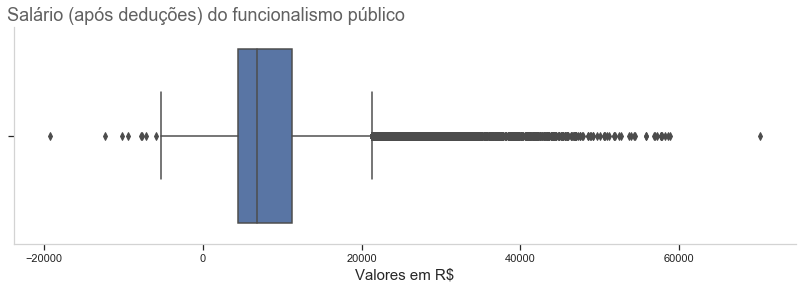

In [81]:
sns.set(style="ticks")
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot()
plt.title('Salário (após deduções) do funcionalismo público',fontsize=18,ha='right',color='#616161')
sns.despine()
# Muda as cores das bordas esquerda e superior para ficarem igual ao fundo
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
sns.boxplot(x="REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)", data=df_servidor_2020)
    
plt.xlabel('Valores em R$', fontsize=15)
plt.show()

Iremos gerar o mesmo gráfico novamente, mas restringindo o eixo x para os valores entre os 1º e 3º Quartis. A análise dos dois será feita a seguir.

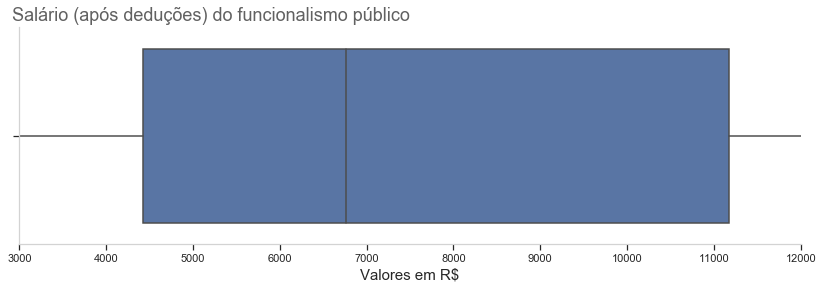

In [82]:
sns.set(style="ticks")
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot()
plt.title('Salário (após deduções) do funcionalismo público',fontsize=18,ha='right',color='#616161')
sns.despine()
# Muda as cores das bordas esquerda e superior para ficarem igual ao fundo
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')
sns.boxplot(x="REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)", data=df_servidor_2020)
    
plt.xlabel('Valores em R$', fontsize=15)
plt.xlim(3000, 12000)
plt.show()

- Pode-se observar que a mediana se encontra abaixo dos R\\$7.000,00. Assim, tem-se categorias (cargos) que ganham mais e outras menos, como é esperado em qualquer estrutura complexa como  o poder executivo federal.
Entretanto, tem-se alguns pontos acima do máximo. Isso mostra **como é difícil fazer conclusões genéricas** do tipo "todo funcionário público ganha bem". Até mesmo porque o conceito de "ganhar bem" não é preciso e varia de acordo com profissão, anos de experiência, localidade, jornada de trabalho entre outros.


- O fato dos 1º, 2º e 3º Quartis estarem abaixo dos R\\$11.200,00 indica que a grande maioria dos servidores (75%) ganha menos do que esse valor. Mesmo assim existem pontos fora desse padrão e que estão acima dos R\\$20.000,00

In [83]:
#Criação da variável ano
salario_ingresso= df_servidor_2020[['DESCRICAO_CARGO','DATA_INGRESSO_ORGAO','REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)','SITUACAO_VINCULO']]

salario_ingresso.dropna(subset=['DATA_INGRESSO_ORGAO'], inplace=True)

#Conertendo o String para data
salario_ingresso.loc[:,'DATA_INGRESSO_ORGAO'] = pd.to_datetime(salario_ingresso.loc[:,'DATA_INGRESSO_ORGAO'], format='%d/%m/%Y')
# salario_ingresso

- Adicionaremos ao dataframe anterior uma coluna denominada ano

In [84]:
salario_ingresso['ano']= salario_ingresso['DATA_INGRESSO_ORGAO'].dt.year
salario_ingresso

,DESCRICAO_CARGO,DATA_INGRESSO_ORGAO,REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$),SITUACAO_VINCULO,ano
0,BIBLIOTECARIO-DOCUMENTALISTA,2008-12-29,5984.979980,ATIVO PERMANENTE,2008
2,Sem informação,2006-07-24,9887.940430,ATIVO PERMANENTE,2006
3,PROFESSOR ENS BASICO TECN TECNOLOGICO,2008-12-29,13964.879883,ATIVO PERMANENTE,2008
4,AGENTE DE COMBATE AS ENDEMIAS,2014-09-04,4754.040039,CEDIDO SUS/LEI 8270,2014
5,AGENTE ADMINISTRATIVO,2012-02-23,4264.970215,ATIVO PERMANENTE,2012
...,...,...,...,...,...
529904,PROFESSOR DO MAGISTERIO SUPERIOR,2005-09-27,13156.549805,ATIVO PERMANENTE,2005
529905,AUXILIAR DE ENFERMAGEM,1996-12-23,4275.839844,ATIVO PERMANENTE,1996
529906,Inválido,2020-04-27,13191.980469,SEM VINCULO,2020
529907,PROFESSOR DE 1 GRAU,1986-08-01,5663.080078,ATIVO PERMANENTE,1986


Ainda na análise salarial, podemos selecionar algumas profissões como **médico**, **engenheiro**, **professor** e **advogado** e analisar algumas métricas dessas profissões. Pontuo mais uma vez que nem todo cargo possui uma relação direta com uma profissão. E mesmo nos cargos relacionados a essas profissões existe um universo com variada experiência profissional. 

- Adicionaremos ao dataframe anterior uma coluna denominada profissão

In [85]:
def profissao(df):
    profissao="OUTROS"
    if("MEDICO" in df):
        #Verifiquei que alguns cargos tem a palavra medicina no nome mas não eram medicina voltada para atendimento humano.
        if((('BIO' not in df)and('VETERINA' not in df)and("ODONTOL" not in df)and("HOSPITA" not in df))):
            profissao="MEDICO"
    if ("ENGENHEIRO" in df):
        profissao="ENGENHEIRO"
    if("ADVOGADO" in df):
        profissao="ADVOGADO"
    if(  "PROFESSOR" in df ):
        profissao="PROFESSOR" 
        
    return profissao    

In [86]:
salario_ingresso['profissao']= salario_ingresso['DESCRICAO_CARGO'].apply(profissao)

In [87]:
salario_ingresso

,DESCRICAO_CARGO,DATA_INGRESSO_ORGAO,REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$),SITUACAO_VINCULO,ano,profissao
0,BIBLIOTECARIO-DOCUMENTALISTA,2008-12-29,5984.979980,ATIVO PERMANENTE,2008,OUTROS
2,Sem informação,2006-07-24,9887.940430,ATIVO PERMANENTE,2006,OUTROS
3,PROFESSOR ENS BASICO TECN TECNOLOGICO,2008-12-29,13964.879883,ATIVO PERMANENTE,2008,PROFESSOR
4,AGENTE DE COMBATE AS ENDEMIAS,2014-09-04,4754.040039,CEDIDO SUS/LEI 8270,2014,OUTROS
5,AGENTE ADMINISTRATIVO,2012-02-23,4264.970215,ATIVO PERMANENTE,2012,OUTROS
...,...,...,...,...,...,...
529904,PROFESSOR DO MAGISTERIO SUPERIOR,2005-09-27,13156.549805,ATIVO PERMANENTE,2005,PROFESSOR
529905,AUXILIAR DE ENFERMAGEM,1996-12-23,4275.839844,ATIVO PERMANENTE,1996,OUTROS
529906,Inválido,2020-04-27,13191.980469,SEM VINCULO,2020,OUTROS
529907,PROFESSOR DE 1 GRAU,1986-08-01,5663.080078,ATIVO PERMANENTE,1986,PROFESSOR


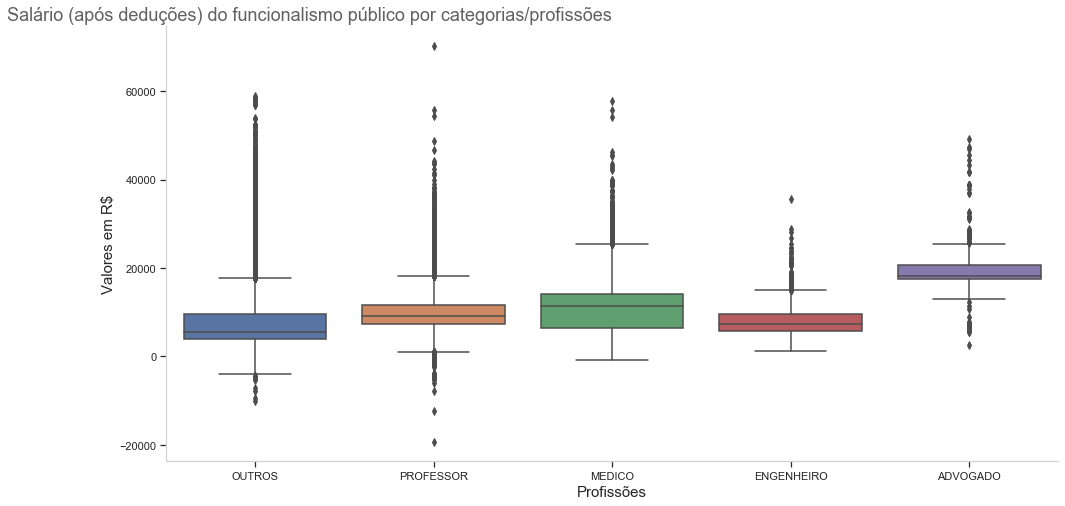

In [88]:
sns.set(style="ticks")
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot()
plt.title('Salário (após deduções) do funcionalismo público por categorias/profissões',fontsize=18,ha='right',color='#616161')
sns.despine()

# Muda as cores das bordas esquerda e superior para ficarem igual ao fundo
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

sns.boxplot(x="profissao",y="REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)",  data=salario_ingresso);
plt.ylabel('Valores em R$', fontsize=15)
plt.xlabel('Profissões', fontsize=15)
plt.show()

- O gráfico acima compara as 4 profissões escolhidas (Professor, Médico, Engenheiro e Advogado) com as outras profissões (Outros)).


- Pode-se observar que os advogados possuem seu boxplot acima das outras profissões. Inclusive a mediana dos Advogados está acima do limite superior de todas outras profissões, exceto dos médicos. Os Advogados também são os que possuem a menor distância interquartil (1º e 3º quartis). Esse fato indica uma maior igualdade salarial dentre os seus profissionais quando comparados com as outras (Professor, Médico, Engenheiro e Outros). 


- Os médicos são os que possuem a maior distância interquartil, caracterizando uma diferença salarial maior entre o 1º e 3º quartil. Vale destacar também que o limite superior dos médicos é o mais alto.  


- Nota-se que todas as profissões possuem pontos destoantes acima do limite superior. Quanto aos pontos abaixo, são mais perceptíveis nos "Outros","Professor" e "advogado". Demonstrando profissionais que ganham destoante da maioria. 

Podemos comparar a data de ingresso no funcionalismo com o salário atual do servidor:

In [89]:
def decada(ano):
    
    if ano<1950: decada='40'
    elif ano<1960: decada='50'
    elif ano<1970: decada='60'    
    elif ano<1980: decada='70'  
    elif ano<1990: decada='80' 
    elif ano<2000: decada='90'
    elif ano<2010: decada='2000'
    elif ano<2020: decada='2010'
    elif ano<2030: decada='2020'
    return decada            

In [90]:
salario_ingresso['decada']= salario_ingresso['ano'].apply(decada)
salario_ingresso['decada'].astype('category')
cat_dtype = pd.api.types.CategoricalDtype(categories = ['40', '50', '60', '70', '80','90','2000','2010','2020'],ordered=True)
salario_ingresso['decada'].astype(cat_dtype)

0         2000
2         2000
3         2000
4         2010
5         2010
          ... 
529904    2000
529905      90
529906    2020
529907      80
529908    2010
Name: decada, Length: 528524, dtype: category
Categories (9, object): [40 < 50 < 60 < 70 ... 90 < 2000 < 2010 < 2020]

In [91]:
salario_ingresso_ano = salario_ingresso.groupby("decada").agg({'decada':['count']})
salario_ingresso_ano.columns = salario_ingresso_ano.columns.droplevel(0)

salario_ingresso_ano

salario_ingresso_ano.reset_index(inplace=True)
salario_ingresso_ano = salario_ingresso_ano.rename(columns = {'decada':'Período','count':"Quantidade de servidores"})

salario_ingresso_ano= salario_ingresso_ano.reindex([3,4,5,6,7,0,1,2])
salario_ingresso_ano

,Período,Quantidade de servidores
3,50,3
4,60,415
5,70,14346
6,80,49483
7,90,46691
0,2000,123299
1,2010,284564
2,2020,9723


In [92]:
#Total de servidores analisados: 528524
salario_ingresso_ano['Quantidade de servidores'].sum()

#Total de servidores que ingressaram antes da década de 90: 64247
salario_ingresso_ano[3:7]['Quantidade de servidores'].sum()
percentual_antes_90= 64247*100/528524
percentual_antes_90

12.155928586024476

#### Como se dá a composição atual dos quadros do funcionalismo no que se refere à década de admissão?

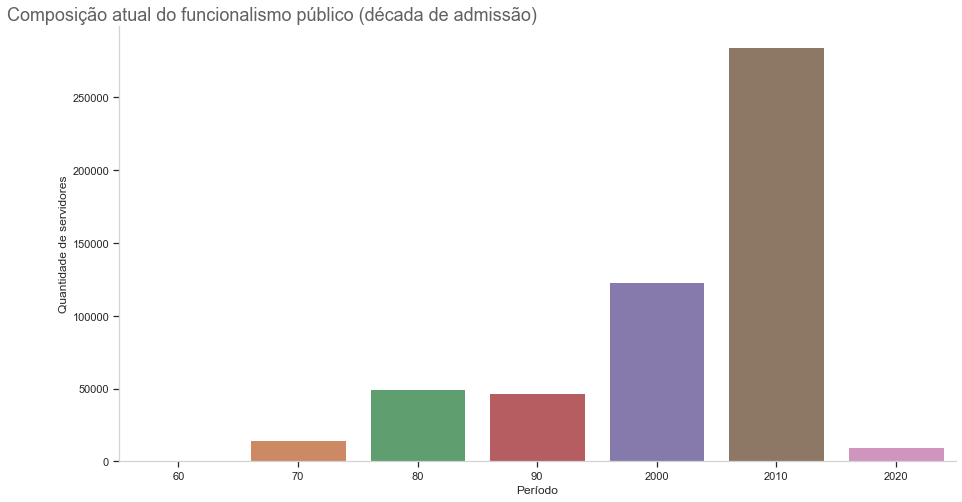

In [93]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()

plt.title('Composição atual do funcionalismo público (década de admissão)',fontsize=18,ha='right',color='#616161')
sns.despine()
# Muda as cores das bordas esquerda e superior para ficarem igual ao fundo
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

sns.barplot(x='Período', y='Quantidade de servidores', data=salario_ingresso_ano,order = ['60','70','80','90','2000','2010','2020'])
plt.show()

- A data de admissão dos funcionários foi dividida por períodos de 10 anos através da função década. 60 indica admissões entre 1960 e 1969; 70 entre 1970 e 1979 e assim por diante.


- O Gráfico mostra que entre os anos 2010 e 2020 houve uma grande admissão de servidores no funcionalismo público federal. Há que se considerar que os funcionários aposentados ou falecidos não figuram na base analisada. Assim, seria equivocado concluir que a admissão a partir de 2010 foi superior à da década de 70.


- O que o gráfico nos mostra é a **composição atual** dos quadros. Tem-se um grande quantitativo (cerca de **64247**) de funcionários públicos que foram admitidos **antes da década de 90**, e que por isso já teriam **mais de 30 anos de serviço público**. Dessa forma, é possível inferir a necessidade futura de reposição dos quadros. 

In [94]:
decada_ingresso_prof = salario_ingresso.groupby(["decada","profissao"]).agg({'decada':['count']})
decada_ingresso_prof.columns = decada_ingresso_prof.columns.droplevel(0)

decada_ingresso_prof 

decada_ingresso_prof.reset_index(inplace=True)

decada_ingresso_prof = decada_ingresso_prof.loc[(decada_ingresso_prof.profissao != "OUTROS")] 

# decada_ingresso_prof = salario_ingresso_ano.rename(columns = {'decada':'Período','count':"Quantidade de servidores"})
# decada_ingresso_prof

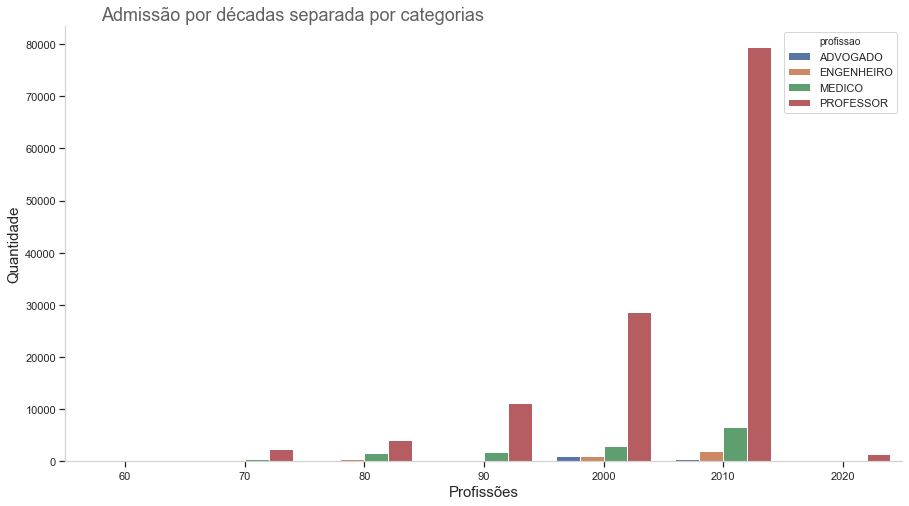

In [95]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()

plt.title('Admissão por décadas separada por categorias',fontsize=18,ha='right',color='#616161')
sns.despine()
# Muda as cores das bordas esquerda e superior para ficarem igual ao fundo
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

sns.barplot(x='decada', y='count',hue="profissao", data=decada_ingresso_prof,order = ['60','70','80','90','2000','2010','2020'])
plt.ylabel('Quantidade', fontsize=15)
plt.xlabel('Profissões', fontsize=15)
plt.show()

- O gráfico mostra a grande contratação de professores no intervalo 2010-2019. Mesmo dentro da profissão de Professor, esse ano representou quase 3 vezes as contratações do 2º maior período (2000-2009).


- Todas as 4 profissões analisadas tiveram seu maior índice de admissão, em relação a composição atual dos quadros, no período 2010-2019, exceto para os Advogados.


- Vale mais uma vez destacar que a data de contratação refere-se aos funcionários no serviço ativo. 

### Conclusões e Achados

Com a presente análise ficou clara a **complexidade dos quadros** que compõem o serviço público. São mais de 1.436 cargos. O dataset original possui dados cadastrais de **765.091** e dados remuneratórios de **549.473** **servidores federais do Poder Executivo**. O dataset em tela refere-se a remuneração de Maio de 2020.


Considerando o dataset analisado, existem 1.435 cargos. Sendo os mais comuns os de **professor e agente/assistente administrativo**.  


Na análise remuneratória, a mediana se encontra abaixo dos R\\$7.000,00. O fato dos 1º, 2º e 3º Quartis estarem abaixo dos R$11.200,00 indica que a grande maioria dos servidores (75%) ganha menos do que esse valor. Mesmo assim existem pontos fora desse padrão e que estão acima dos R\\$20.000,00

Quando analisada a questão remuneratória destacando 4 profissões em relação as outras, isso é, Professor, Médico, Engenheiro, Advogado e Outros, pode-se observar que os **advogados** possuem sua caixa (1º-3º quartis) acima das outras profissões, indicando uma **remuneração**, em geral, **maior que as outras profissões**. Inclusive a mediana dos Advogados está acima do limite superior de todas outras profissões, exceto dos médicos. Os Advogados também são os que possuem a menor distância interquartil (1º e 3º quartis). Esse fato indica uma **maior igualdade salarial** dentre os seus profissionais quando comparados com as outras (Professor, Médico, Engenheiro e Outros).

Os médicos são os que possuem a maior distância interquartil, caracterizando uma diferença salarial maior entre o 1º e 3º quartil. Vale destacar também que o limite superior dos médicos é o mais alto. 

Quanto a atual composição dos quadros, destaca-se a grande quantidade de servidores que foram admitidos entre  2010 e 2019: 284.564 servidores.

Verificou-se ainda um grande quantitativo (cerca de 64.247) de funcionários públicos que foram admitidos antes da década de 90, e que por isso já teriam mais de 30 anos de serviço público. Dessa forma, é possível inferir a necessidade futura de reposição dos quadros diante da eminente aposentaroia deles. 

Quando combinamos a análise de adminissão com a dos cargos dos quadros atuais, verificou-se uma grande contratação de professores no intervalo 2010-2019 (3x maior que o 2º maior período).